# Dataset Exploration

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data-2025-01.csv')
df.head()

,game_id,white_elo,black_elo,opening,winner
0,1,1657,1610,Bishop's Opening: Berlin Defense,2
1,2,971,1093,Queen's Gambit Declined: Albin Countergambit,2
2,3,1693,1698,Mikenas Defense,2
3,4,1759,1704,"French Defense: Tarrasch Variation, Guimard De...",1
4,5,1137,1184,French Defense: Queen's Knight,2


## ELOs analysieren

In [53]:
df['avg_elo'] = df[['white_elo', 'black_elo']].mean(axis=1)

In [54]:
def elo_group(elo):
    if elo < q1:
        return "Beginner"
    elif elo < q2:
        return "Intermediate"
    elif elo < q3:
        return "Advanced"
    else:
        return "Expert"


df['elo_group'] = df['avg_elo'].apply(elo_group)
df.head()

,game_id,white_elo,black_elo,opening,winner,avg_elo,elo_group
0,1,1657,1610,Bishop's Opening: Berlin Defense,2,1633.5,Advanced
1,2,971,1093,Queen's Gambit Declined: Albin Countergambit,2,1032.0,Beginner
2,3,1693,1698,Mikenas Defense,2,1695.5,Advanced
3,4,1759,1704,"French Defense: Tarrasch Variation, Guimard De...",1,1731.5,Advanced
4,5,1137,1184,French Defense: Queen's Knight,2,1160.5,Beginner


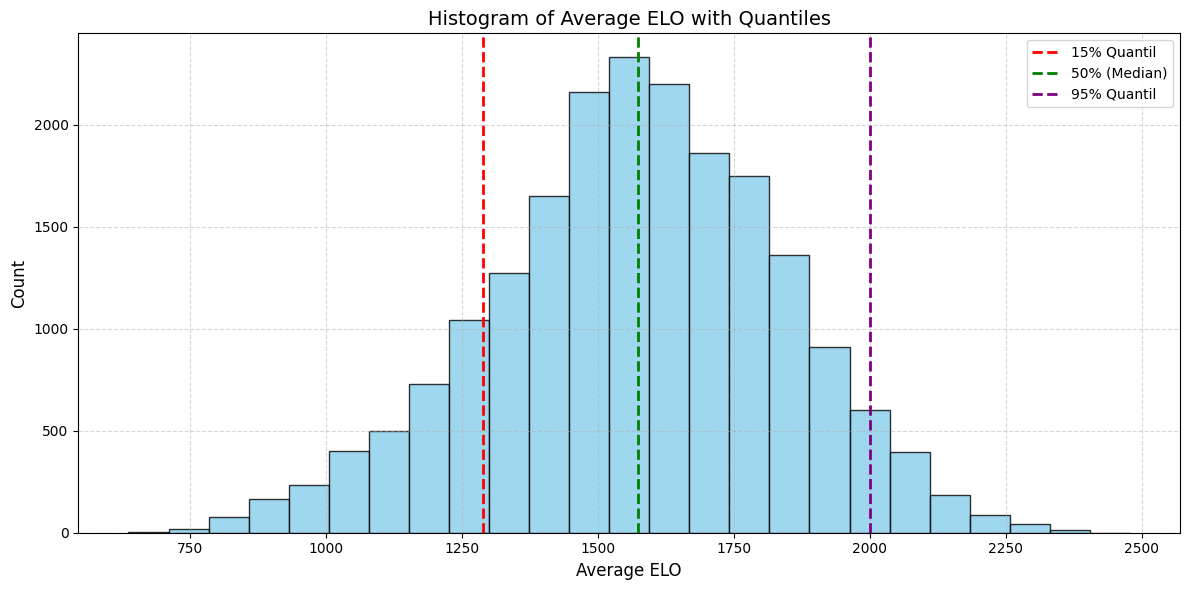

In [55]:
q1 = df['avg_elo'].quantile(0.15)
q2 = df['avg_elo'].quantile(0.5)
q3 = df['avg_elo'].quantile(0.95)

plt.figure(figsize=(12, 6))
plt.hist(df['avg_elo'], bins=25, color='skyblue', edgecolor='black', alpha=0.8)

plt.axvline(q1, color='red', linestyle='--', linewidth=2, label='15% Quantil')
plt.axvline(q2, color='green', linestyle='--', linewidth=2, label='50% (Median)')
plt.axvline(q3, color='purple', linestyle='--', linewidth=2, label='95% Quantil')

plt.xlabel('Average ELO', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Average ELO with Quantiles', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Vergleich von Winrates

In [56]:
counts = df.groupby('elo_group')['winner'].value_counts(normalize=True).unstack(fill_value=0)
counts = counts.round(2)
counts = counts.rename(columns={
    0: "Remis",
    1: "Weiß gewinnt",
    2: "Schwarz gewinnt"
})
counts = counts.loc[["Beginner", "Intermediate", "Advanced", "Expert"]]

counts.head()

winner,Remis,Weiß gewinnt,Schwarz gewinnt
elo_group,,,
Beginner,0.05,0.49,0.46
Intermediate,0.04,0.49,0.46
Advanced,0.06,0.49,0.45
Expert,0.10,0.47,0.43


## Beste Openings für ELO-Gruppen bestimmen

In [57]:
summary = (
    df.groupby("opening")["winner"]
    .value_counts()
    .unstack(fill_value=0)
    .rename(columns={0: "draw", 1: "white_wins", 2: "black_wins"})
)

summary["total_games"] = summary.sum(axis=1)
summary.reset_index(inplace=True)

summary["white_winrate"] = (summary.white_wins / summary.total_games).round(2)
summary["black_winrate"] = (summary.black_wins / summary.total_games).round(2)

summary.head()

winner,opening,draw,white_wins,black_wins,total_games,white_winrate,black_winrate
0,Alekhine Defense,3,35,22,60,0.58,0.37
1,Alekhine Defense: Balogh Variation,0,0,2,2,0.00,1.00
2,Alekhine Defense: Brooklyn Variation,1,0,0,1,0.00,0.00
3,Alekhine Defense: Exchange Variation,0,1,1,2,0.50,0.50
4,Alekhine Defense: Four Pawns Attack,0,1,1,2,0.50,0.50


In [58]:
# Best Openings for White
best = summary[summary['total_games'] > 100]
best.sort_values(by="white_winrate", ascending=False).head()

winner,opening,draw,white_wins,black_wins,total_games,white_winrate,black_winrate
1026,Scotch Game,4,122,67,193,0.63,0.35
1018,Scandinavian Defense: Mieses-Kotroc Variation,6,109,66,181,0.60,0.36
883,Queen's Pawn Game: Accelerated London System,29,232,164,425,0.55,0.39
437,Italian Game: Anti-Fried Liver Defense,10,110,83,203,0.54,0.41
228,English Opening: King's English Variation,6,55,43,104,0.53,0.41


In [59]:
# Best Openings for Black
best.sort_values(by="black_winrate", ascending=False).head()

winner,opening,draw,white_wins,black_wins,total_games,white_winrate,black_winrate
1187,Sicilian Defense: Old Sicilian,5,57,77,139,0.41,0.55
614,King's Pawn Game: Leonardis Variation,5,54,71,130,0.42,0.55
131,Caro-Kann Defense: Exchange Variation,5,46,58,109,0.42,0.53
260,Englund Gambit,3,45,54,102,0.44,0.53
291,French Defense: Advance Variation,2,52,60,114,0.46,0.53
